In [1]:
#import pandas, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#change display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#read in and preview file
#download path https://www.kaggle.com/toshimelonhead/400000-kickstarter-projects
file_path = 'kickstarter.csv'

data = pd.read_csv(file_path, index_col = 'id')
print(data.head(1))

           Unnamed: 0  backers_count  \
id                                     
857125548           0              1   

                                                       blurb currency    goal  \
id                                                                              
857125548  Exploring paint and its place in a digital world.      USD  2000.0   

                   launched_at             deadline location.country   name  \
id                                                                            
857125548  2015-03-19 22:34:57  2015-04-30 23:12:00               US  Remix   

           usd_pledged  ... days_to_deadline  goal_USD  category_name  \
id                      ...                                             
857125548         25.0  ...               42    2000.0    Digital Art   

           category_slug blurb_length  location_type  location_country  \
id                                                                       
857125548            art     

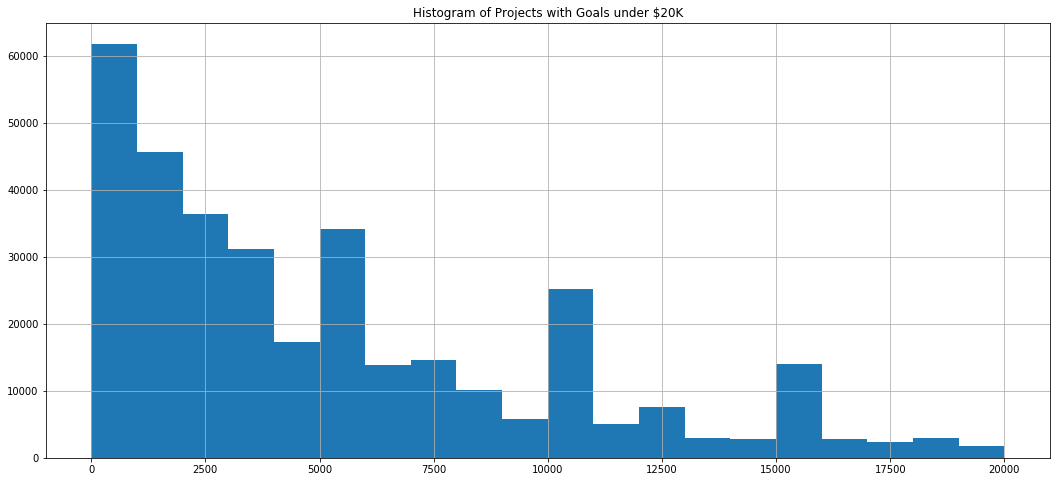

In [3]:
#attempt to understand goal_USD data shape by only looking at data under 20k (too zoomed out without the restriction)
data['goal_USD'].loc[data['goal_USD'] < 20000].hist(bins = 20, figsize=(18,8))
plt.title('Histogram of Projects with Goals under $20K')
plt.show()

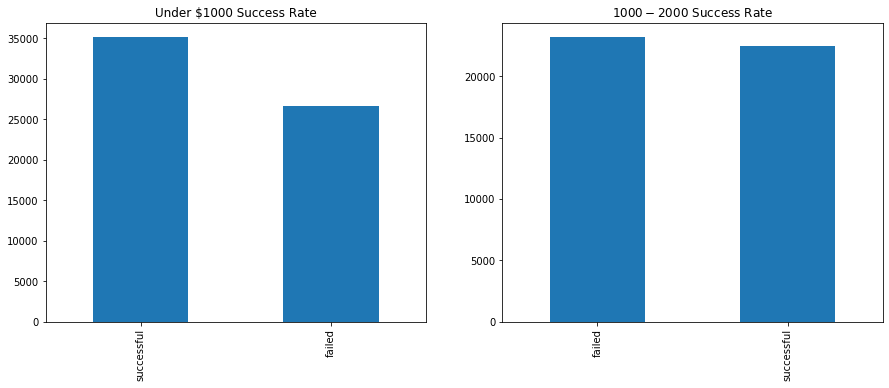

In [4]:
#Checking first 1000 category against 2nd 1000. Already by the second, failure is more likely than success.
fig=plt.figure(figsize=(15,5.5))
plt.subplot(1,2,1)
plt.title('Under $1000 Success Rate')
data['binary_state'].loc[data['goal_USD'] < 1000].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("$1000 - $2000 Success Rate")
data['binary_state'][(data['goal_USD'] >= 1000) & (data['goal_USD'] < 2000)].value_counts().plot(kind='bar')
plt.show()


I decided to throw out data with a goal under $1000 as they do not seem to be "serious" crowdfunding projects.

In [5]:
#throwing data with a goal under 1000
cleaned_data = data.loc[data['goal_USD'] >= 1000]
#print out approximate time when data was captured
print(cleaned_data['launched_at'].max())
#filter out data where target date is beyond the date of the data
cleaned_data = cleaned_data.loc[cleaned_data['deadline'] <= cleaned_data['launched_at'].max()]

2019-04-18 04:49:38


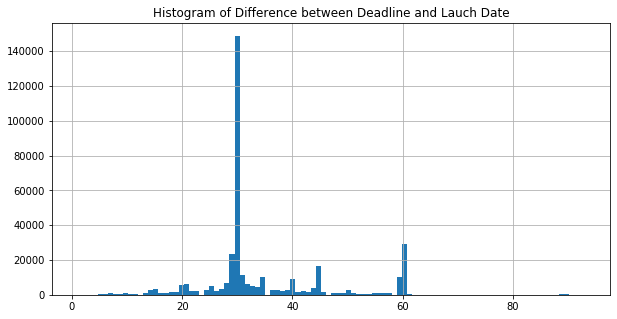

In [6]:
#create a new column for days between launch and goal date
cleaned_data['launched_at'] = pd.to_datetime(cleaned_data['launched_at'])
cleaned_data['deadline'] = pd.to_datetime(cleaned_data['deadline'])

cleaned_data['days_between'] = (cleaned_data['deadline'] - cleaned_data['launched_at']).dt.days
cleaned_data['days_between'].hist(bins = 100, figsize = (10, 5))
plt.title('Histogram of Difference between Deadline and Lauch Date')
plt.show()

Most Kickstarters have the deadline set at around 30 days from the launch date. There are no extreme outliers (or they have been filtered out).

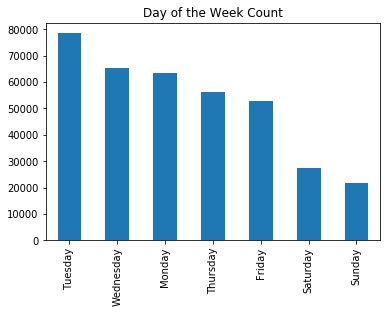

In [7]:
cleaned_data['day_week'] = cleaned_data['launched_at'].dt.day_name()
cleaned_data['day_week'].value_counts().plot(kind='bar')
plt.title('Day of the Week Count')
plt.show()

The middle of the week is the most popular launch time.

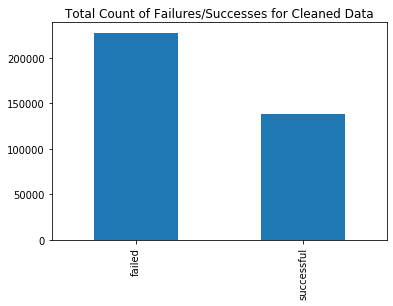

In [8]:
#create a bar chart of binary_state column
cleaned_data['binary_state'].value_counts().plot(kind='bar')
plt.title('Total Count of Failures/Successes for Cleaned Data')
plt.show()

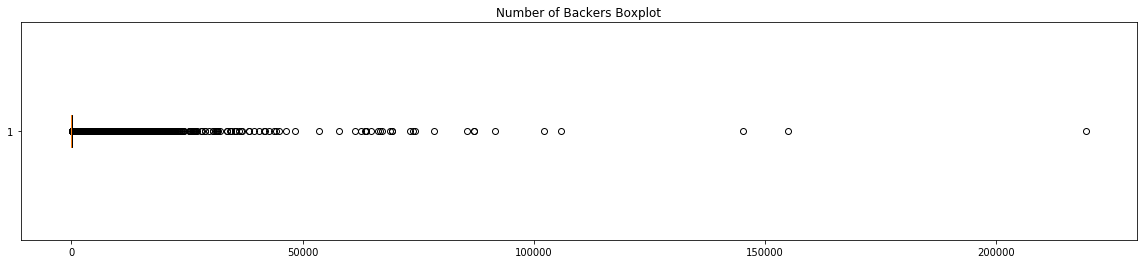

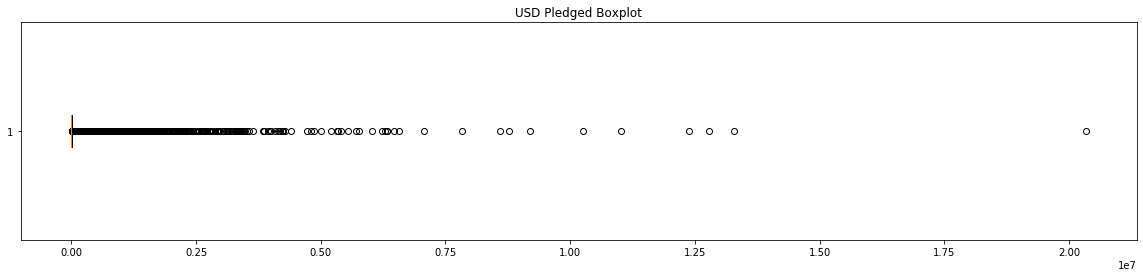

In [9]:
#looking distribution of the backers_count and pledged amount columns
plt.figure(figsize=(20,4))
plt.boxplot(cleaned_data['backers_count'], vert = False)
plt.title('Number of Backers Boxplot')
plt.show()
plt.figure(figsize=(20,4))
plt.boxplot(cleaned_data['usd_pledged'], vert = False)
plt.title('USD Pledged Boxplot')
plt.show()

Successful Kickstarter campaigns are outliers in themselves

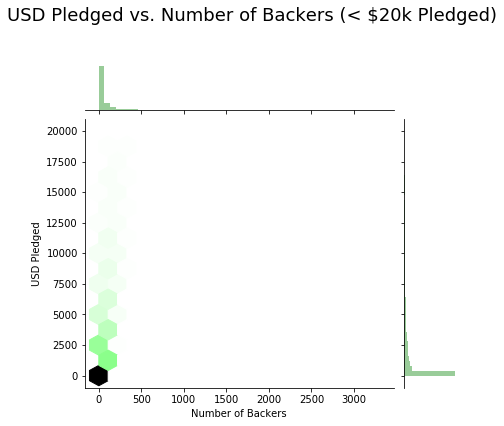

In [41]:
#practice hex binning data for visualization

x = cleaned_data['backers_count'].loc[cleaned_data['usd_pledged'] < 20000]
y = cleaned_data['usd_pledged'].loc[cleaned_data['usd_pledged'] < 20000]

joint_kws=dict(gridsize=15)

fig = sns.jointplot(x, y, kind ="hex",  
                    color ="green", joint_kws= joint_kws) 
  
fig.fig.subplots_adjust(top = 0.85) 

fig.set_axis_labels('Number of Backers',  
                    'USD Pledged') 
  
fig.fig.suptitle('USD Pledged vs. Number of Backers (< $20k Pledged)',  
                 size = 18); 

plt.show()



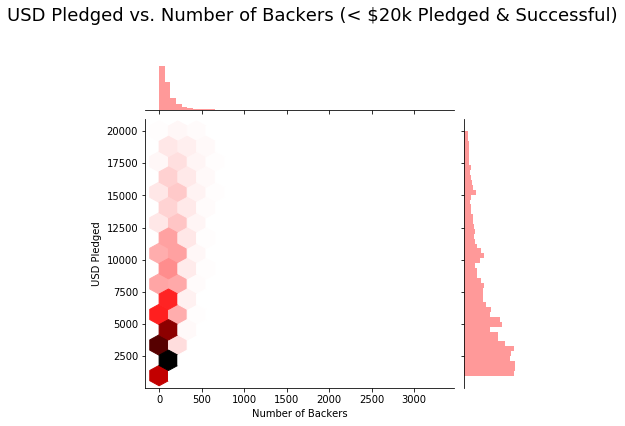

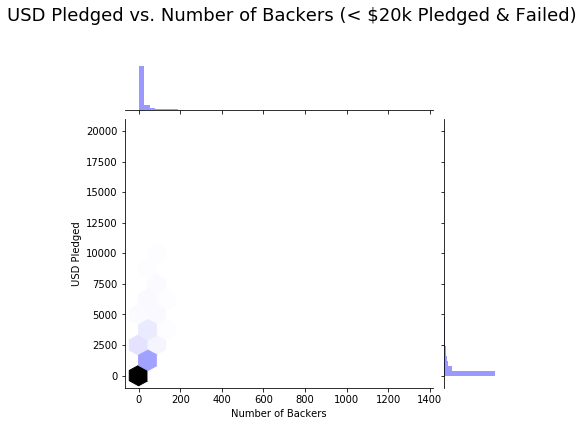

In [54]:
#Successful kickstarter projects

x = cleaned_data['backers_count'].loc[(cleaned_data['usd_pledged'] < 20000) & (cleaned_data['binary_state'] == 'successful')]
y = cleaned_data['usd_pledged'].loc[(cleaned_data['usd_pledged'] < 20000) & (cleaned_data['binary_state'] == 'successful')]

joint_kws=dict(gridsize=15)

fig = sns.jointplot(x, y, kind ="hex",  
                    color ="red", joint_kws= joint_kws) 
  
fig.fig.subplots_adjust(top = 0.85) 

fig.set_axis_labels('Number of Backers',  
                    'USD Pledged') 
  
fig.fig.suptitle('USD Pledged vs. Number of Backers (< $20k Pledged & Successful)',  
                 size = 18); 
plt.show()
#Unsuccessful

x = cleaned_data['backers_count'].loc[(cleaned_data['usd_pledged'] < 20000) & (cleaned_data['binary_state'] == 'failed')]
y = cleaned_data['usd_pledged'].loc[(cleaned_data['usd_pledged'] < 20000) & (cleaned_data['binary_state'] == 'failed')]

joint_kws=dict(gridsize=15)

fig = sns.jointplot(x, y, kind ="hex",  
                    color ="blue", joint_kws= joint_kws) 
  
fig.fig.subplots_adjust(top = 0.85) 

fig.set_axis_labels('Number of Backers',  
                    'USD Pledged') 
  
fig.fig.suptitle('USD Pledged vs. Number of Backers (< $20k Pledged & Failed)',  
                 size = 18); 

plt.show()

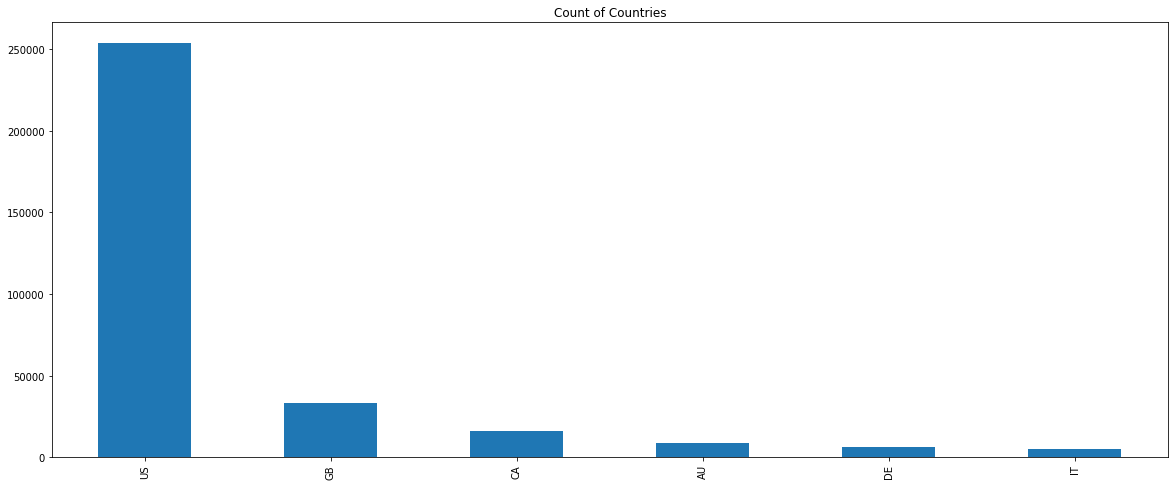

In [32]:
#show the frequency of location country for those with at least 5000 occurrences
cleaned_data['location.country'].value_counts()[cleaned_data['location.country'].value_counts()>5000].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Count of Countries")
plt.show()


There are only six countries with more than 5000 occurrences. The US dominates with Great Britain and Canada coming in second and third.

In [33]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365236 entries, 857125548 to 1535298356
Data columns (total 31 columns):
Unnamed: 0                   365236 non-null int64
backers_count                365236 non-null int64
blurb                        365236 non-null object
currency                     365236 non-null object
goal                         365236 non-null float64
launched_at                  365236 non-null datetime64[ns]
deadline                     365236 non-null datetime64[ns]
location.country             364314 non-null object
name                         365232 non-null object
usd_pledged                  365236 non-null float64
slug                         365236 non-null object
spotlight                    365236 non-null bool
staff_pick                   365236 non-null bool
static_usd_rate              365236 non-null float64
state                        365236 non-null object
year                         365236 non-null int64
month                        3652